<a href="https://colab.research.google.com/github/anumit-web/ML-Analytics-Portfolio-2024/blob/main/Customer%20Segmentation%20Analysis/ML_customer_segmentation_analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning

# unsupervised learning
discovers patterns in the dataset from unlabelled data.
group data points based on similar attributes
clustering

example --> Customer Segmentation Analysis

k-means clustering algorithm

https://neptune.ai/blog/customer-segmentation-using-machine-learning

In [ ]:
print("Hello World")

Hello World


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [ ]:
#Load customers data
customersdata_df = pd.read_csv("customers-data.csv")

In [ ]:
customersdata_df.shape
#24,000 rows and 4 columns of data

(24000, 4)

In [ ]:
customersdata_df.head()

,customer_id,products_purchased,complains,money_spent
0,1000661,1,0,260.0
1,1001914,1,0,790.2
2,1002167,3,0,234.2
3,1002387,1,0,890.0
4,1002419,2,0,103.0


In [ ]:
customersdata_df.tail()

,customer_id,products_purchased,complains,money_spent
23995,1000661,1,0,263.0
23996,1001915,1,1,799.2
23997,1002165,3,0,235.2
23998,1002387,1,0,894.0
23999,1002411,2,0,105.0


In [ ]:
customersdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         24000 non-null  int64  
 1   products_purchased  24000 non-null  int64  
 2   complains           24000 non-null  int64  
 3   money_spent         24000 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 750.1 KB


In [ ]:
customersdata_df.describe()

,customer_id,products_purchased,complains,money_spent
count,2.400000e+04,24000.000000,24000.000000,24000.000000
mean,1.001908e+06,1.600000,0.010000,456.830000
std,6.489202e+02,0.800017,0.117901,320.704042
min,1.000660e+06,1.000000,0.000000,102.000000
25%,1.001913e+06,1.000000,0.000000,233.700000
50%,1.002166e+06,1.000000,0.000000,260.500000
75%,1.002387e+06,2.000000,0.000000,793.200000
max,1.002419e+06,3.000000,2.000000,894.000000


# Define K-means model

In [ ]:
# Define K-means model
kmeans_model = KMeans(init='k-means++',  max_iter=400, random_state=42)


# Train the model

In [ ]:

# Train the model
kmeans_model.fit(customersdata_df[['products_purchased','complains', 'money_spent']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(max_iter=400, random_state=42)

# Finding the optimal number of clusters

In [ ]:
# Create the K means model for different values of K
def try_different_clusters(K, data):

    cluster_values = list(range(1, K+1))
    inertias=[]

    for c in cluster_values:
        model = KMeans(n_clusters = c,init='k-means++',max_iter=400,random_state=42)
        model.fit(data)
        inertias.append(model.inertia_)

    return inertias

# Find output for k values between 1 to 12

In [ ]:
# Find output for k values between 1 to 12
outputs = try_different_clusters(12, customersdata_df[['products_purchased','complains','money_spent']])

distances = pd.DataFrame({"clusters": list(range(1, 13)),"sum of squared distances": outputs})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

temp

In [ ]:
# Finding optimal number of clusters k
figure = go.Figure()
figure.add_trace(go.Scatter(x=distances["clusters"], y=distances["sum of squared distances"]))

figure.update_layout(xaxis = dict(tick0 = 1,dtick = 1,tickmode = 'linear'),
                  xaxis_title="Number of clusters",
                  yaxis_title="Sum of squared distances",
                  title_text="Finding optimal number of clusters using elbow method")
figure.show()

hello

In [ ]:
# Re-Train K means model with k=5
kmeans_model_new = KMeans(n_clusters = 5,init='k-means++',max_iter=400,random_state=42)

kmeans_model_new.fit_predict(customersdata_df[['products_purchased','complains','money_spent']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([4, 3, 1, ..., 1, 0, 2], dtype=int32)

# Visualizing customer segments

using plotly express

In [ ]:
# Create data arrays
cluster_centers = kmeans_model_new.cluster_centers_
data = np.expm1(cluster_centers)
points = np.append(data, cluster_centers, axis=1)
points

<ipython-input-153-ffdb0ff0bada>:3: RuntimeWarning:

overflow encountered in expm1



array([[1.71828183e+000, 2.02013400e-002,             inf,
        1.00000000e+000, 2.00000000e-002, 8.91750000e+002],
       [1.90855369e+001, 2.04697370e-016, 1.09015568e+102,
        3.00000000e+000, 2.04697370e-016, 2.34950000e+002],
       [6.38905610e+000, 5.01252086e-003, 1.14301649e+045,
        2.00000000e+000, 5.00000000e-003, 1.03750000e+002],
       [1.71828183e+000, 1.00501671e-002,             inf,
        1.00000000e+000, 1.00000000e-002, 7.92700000e+002],
       [1.71828183e+000, 1.51130646e-002, 2.24315755e+113,
        1.00000000e+000, 1.50000000e-002, 2.61000000e+002]])

In [ ]:
# Add "clusters" to customers data
points = np.append(points, [[0], [1], [2], [3], [4]], axis=1)
customersdata_df["clusters"] = kmeans_model_new.labels_

In [ ]:
customersdata_df.head()

,customer_id,products_purchased,complains,money_spent,clusters
0,1000661,1,0,260.0,4
1,1001914,1,0,790.2,3
2,1002167,3,0,234.2,1
3,1002387,1,0,890.0,0
4,1002419,2,0,103.0,2


# temp

In [315]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np


# temp

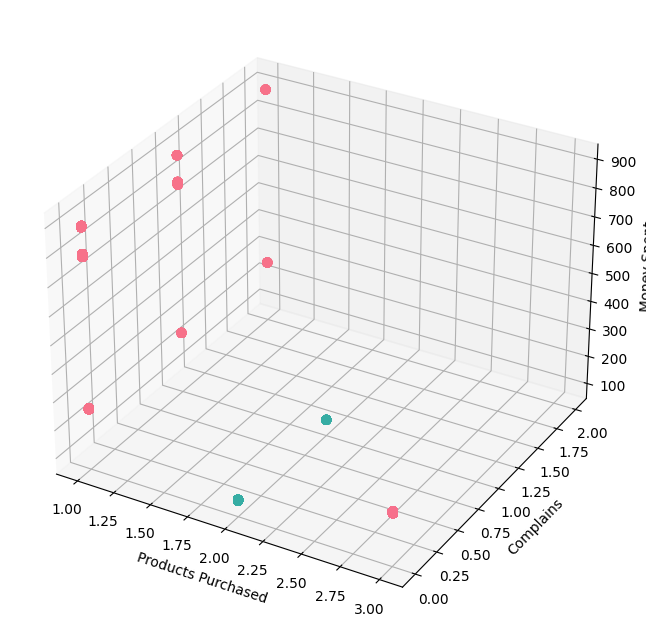

In [320]:

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# ax.scatter(iris['sepal_length'], iris['sepal_width'], iris['petal_length'], c=iris['petal_width'])

x = customersdata_df['products_purchased']
y = customersdata_df['complains']
z = customersdata_df['money_spent']

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

ax.scatter(x, y, z, c=x, cmap=cmap, marker='o', s=40, alpha=1)

ax.set_xlabel('Products Purchased')
ax.set_ylabel('Complains')
ax.set_zlabel('Money Spent')

plt.show()


# temp